<img src="http://mathinsight.org/media/image/image/spherical_coordinates.png" style="width: 200px;"/>

$\vec{y} = \begin{pmatrix} x \\ y \\ z \end{pmatrix} = f(\vec{p}) = f \left( \begin{pmatrix} \phi \\ \theta \end{pmatrix} \right) = \begin{pmatrix} \sin \phi \cos \theta \\ \sin \phi \sin \theta \\ \cos \phi \end{pmatrix}$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from __future__ import division

import numpy as np
import sympy

from util import plotutil

from infotopo import predict
from infotopo.models.sphere import pred

pi = np.pi
sin, cos = sympy.sin, sympy.cos
diff = sympy.diff
simplify = sympy.simplify
sympy.init_printing()

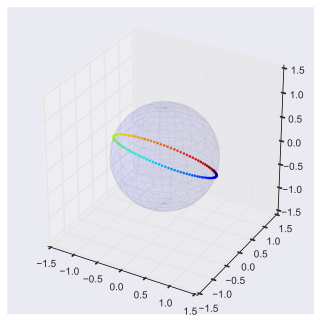

In [112]:
gds = pred.get_geodesic(p0=[pi/2, 0], v0=[np.sqrt(2)/2,np.sqrt(2)/2], ptype='', lam=0, const_speed='y',
                        integrator='vode', atol=1e-9, rtol=1e-9, dt=1e-4)
gds.integrate(tmax=2*pi, dt=2*pi/100, print_step=0)

pred.plot_image(np.linspace(0,pi,21), np.linspace(0,2*pi,21), pts=gds.ytraj, cs=gds.ts, alpha=0.05)

In [4]:
phi, theta = sympy.symbols('phi theta')
fx = sin(phi) * cos(theta)
fy = sin(phi) * sin(theta)
fz = cos(phi)

In [5]:
J = np.array([[diff(fx, phi), diff(fx, theta)], 
              [diff(fy, phi), diff(fy, theta)], 
              [diff(fz, phi), diff(fz, theta)]])

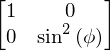

In [204]:
g11 = simplify(np.dot(J[:,0], J[:,0]))
g12 = g21 = simplify(np.dot(J[:,0], J[:,1]))
g22 = simplify(np.dot(J[:,1], J[:,1]))
g = sympy.Matrix([[g11, g12], [g21, g22]])
g
#from IPython.display import display

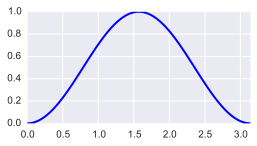

In [7]:
phis = np.linspace(0, pi, 101)
plotutil.plot([phis], [np.sin(phis)**2], markers='', figsize=(4,2), xylims=[[0,pi],None])

$A = \frac{d^2 y}{d t^2} = \frac{d V}{d t} = \frac{d (Jv)}{d t} \\
= A_a + A_v \\
= J a + \frac{d J}{d t} v = J a + (\frac{\partial J}{\partial p} \frac{d p}{d t}) v$

$A_v = A \bigg|_{v, a=0}$ is the term in $A$ that doesn't depend on acceleration $a$, but only velocity $v$. Hence the finite difference method in the code.

$\frac{\partial J}{\partial p}: \; \frac{\partial J_{\cdot \alpha}}{\partial p^\beta} = \nabla_\beta J_{\cdot \alpha} + n^\alpha_\beta = \Gamma^\mu_{\alpha \beta} J_{\cdot \mu} + n^\alpha_\beta$

Writing the rest of the terms in components:

$A_m = J_{m \mu} a^\mu + (\Gamma^\mu_{\alpha \beta} J_{m \mu} + n^\alpha_\beta) v^\beta v^\alpha$

Geodesic equation says that the sum of all the non-normal terms has to be zero:

$(P_{//} A)_m = 0 \\
\Rightarrow J_{m \mu} a^\mu + \Gamma^\mu_{\alpha \beta} J_{m \mu} v^\beta v^\alpha = 0 \\ 
\Rightarrow a^\mu + \Gamma^\mu_{\alpha \beta} v^\beta v^\alpha = 0$

Generally,

$\Gamma^\mu_{\alpha \beta} = \frac{1}{2} g^{\mu \nu} \left( \partial_\beta g_{\nu \alpha} + \partial_\alpha g_{\nu \beta} - \partial_\nu g_{\alpha \beta} \right)$, where $\nu$ is the dummy variable.

For the sphere's $g$: 

$\Gamma^\phi_{\phi \phi} = 0$

$\Gamma^\theta_{\phi \phi} = 0$

$\Gamma^\phi_{\phi \theta} = \frac{1}{2} g^{\phi \phi} \left( \partial_\theta g_{\phi \phi} + \color{red}{\partial_\phi g_{\phi \theta} - \partial_\phi g_{\phi \theta}} \right) + \frac{1}{2} \color{red}{g^{\phi \theta}} \left(\partial_\theta g_{\theta \phi} + \partial_\phi g_{\theta \theta} - \partial_\theta g_{\phi \theta} \right) = \frac{1}{2} g^{\phi \phi} \color{red}{\partial_\theta g_{\phi \phi}} = 0$

$\Gamma^\theta_{\phi \theta} = \frac{1}{2} \color{red}{g^{\theta \phi}} \left( \partial_\theta g_{\phi \phi} + \partial_{\phi} g_{\phi \theta} - \partial_\phi g_{\phi \theta} \right) + \frac{1}{2} g^{\theta \theta} \left(\partial_\theta g_{\theta \phi} + \partial_\phi g_{\theta \theta} - \partial_\theta g_{\phi \theta} \right) = \frac{1}{2} g^{\theta \theta} \partial_\phi g_{\theta \theta} = \frac{1}{2} \frac{1}{\sin^2 \phi} 2 \sin \phi \cos \phi = \frac{\cos \phi}{\sin \phi} = \cot \phi$

$\Gamma^\phi_{\theta \phi} = \Gamma^\phi_{\phi \theta} = 0$

$\Gamma^\theta_{\theta \phi} = \Gamma^\theta_{\phi \theta} = \cot \phi$

$\Gamma^\phi_{\theta \theta} = \frac{1}{2} g^{\phi \phi} \left(\color{red}{\partial_{\theta} g_{\phi \theta} + \partial_{\theta} g_{\theta \phi}} - \partial_{\phi} g_{\theta \theta} \right) + \frac{1}{2} \color{red}{g^{\phi \theta}} (\cdots) = -g^{\phi \phi} \partial_{\phi} g_{\theta \theta} = - \sin \phi \cos \phi$

$\Gamma^\theta_{\theta \theta} = 0$

Geodesic equation:

$\ddot{\phi} + \color{red}{\Gamma^\phi_{\phi \phi}} \dot{\phi} \dot{\phi} + \color{red}{\Gamma^\phi_{\phi \theta}} \dot{\phi} \dot{\theta} + \color{red}{\Gamma^\phi_{\theta \phi}} \dot{\theta} \dot{\phi} + \Gamma^\phi_{\theta \theta} \dot{\theta} \dot{\theta} = 0 \quad \Rightarrow \quad \ddot{\phi} - \sin \phi \cos \phi \dot{\theta} \dot{\theta} = 0$

$\ddot{\theta} + \color{red}{\Gamma^\theta_{\phi \phi}} \dot{\phi} \dot{\phi} + \Gamma^\theta_{\phi \theta} \dot{\phi} \dot{\theta} + \Gamma^\theta_{\theta \phi} \dot{\theta} \dot{\phi} + \color{red}{\Gamma^\theta_{\theta \theta}} \dot{\theta} \dot{\theta} = 0 \quad \Rightarrow \quad \ddot{\theta} + 2 \cot \phi \dot{\phi} \dot{\theta} = 0$

The same equation can be using [**Euler-Lagrange equation**](http://sgovindarajan.wikidot.com/twosphere). 

In [73]:
def rhs(t, pv):
    p, v = pv[:2], pv[2:]
    ph, th = p
    vph, vth = v
    a = [np.sin(ph) * np.cos(ph) * vth * vth, - 2 / np.tan(ph) * vph * vth]
    return np.append(v, a)

In [207]:
from scipy.integrate import ode as ODE

ode = ODE(rhs).set_initial_value([pi/2, 0, np.sqrt(2)/2, np.sqrt(2)/2])

def get_sol(ode, tmax, dt=None, nstep=None):
    if nstep is not None:
        dt = tmax / nstep
    ts, sol = [], [ode.y]
    while ode.successful() and ode.t < tmax:
        ts.append(ode.t)
        sol.append(ode.integrate(ode.t+dt))
    ts.append(ode.t)
    return ts, np.array(sol)

ts, sol = get_sol(ode, 2*pi, nstep=100)

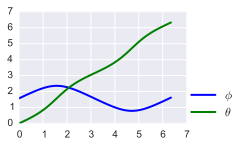

In [208]:
plotutil.plot([ts]*2, sol.T[:2], markers='', figsize=(3,2), legends=[r'$\phi$', r'$\theta$'])

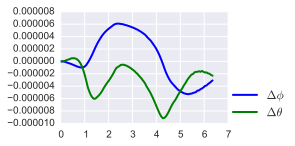

In [209]:
plotutil.plot([ts]*2, sol.T[:2]-gds.ps.values.T, markers='', figsize=(3,2), 
              legends=[r'$\Delta \phi$', r'$\Delta \theta$'])